In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Lab 1

Welcome to the first lab of DSCI 311! This lab is meant to help you familiarize yourself with Jupyter, review Python and NumPy, and introduce you to `matplotlib`, a Python visualization library. 

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**This lab is due Tuesday, October 7th at 11:59 PM.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

---
## Part 1: Jupyter Tips


### Viewing Documentation

To output the documentation for a function, use the `help` function.

In [2]:
help(print)

Help on built-in function print in module builtins:

print(*args, sep=' ', end='\n', file=None, flush=False)
    Prints the values to a stream, or to sys.stdout by default.
    
    sep
      string inserted between values, default a space.
    end
      string appended after the last value, default a newline.
    file
      a file-like object (stream); defaults to the current sys.stdout.
    flush
      whether to forcibly flush the stream.



You can also use Jupyter to view function documentation inside your notebook. The function must already be defined in the kernel for this to work.

Below, click your mouse anywhere on `print()` and use `Shift` + `Tab` to view the function's documentation. 

In [3]:
print('Welcome to DSCI 311.')

Welcome to DSCI 311.


### Importing Libraries and Magic Commands

In DSCI 311, we will be using common Python libraries to help us process data. By convention, we import all libraries at the very top of the notebook. There are also a set of standard aliases that are used to shorten the library names. Below are some of the libraries that you may encounter throughout the course, along with their respective aliases.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Initialize Otter
import otter
grader = otter.Notebook()

`%matplotlib inline` is a [Jupyter magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that configures the notebook so that Matplotlib displays any plots that you draw directly in the notebook rather than to a file, allowing you to view the plots upon executing your code. (Note: In practice, this is no longer necessary, but we're showing it to you now anyway)

Another useful magic command is `%%time`, which times the execution of that cell. You can use this by writing it as the first line of a cell. (Note that `%%` is used for *cell magic commands* that apply to the entire cell, whereas `%` is used for *line magic commands* that only apply to a single line.)

In [5]:
%%time

lst = []
for i in range(100):
    lst.append(i)

CPU times: user 9 μs, sys: 1 μs, total: 10 μs
Wall time: 11.9 μs


### Keyboard Shortcuts

Even if you are familiar with Jupyter, we strongly encourage you to become proficient with keyboard shortcuts (this will save you time in the future). To learn about keyboard shortcuts, go to **Help --> Keyboard Shortcuts** in the menu above. 

Here are a few that we like:
1. `Ctrl` + `Return` : *Evaluate the current cell*
1. `Shift` + `Return`: *Evaluate the current cell and move to the next*
1. `ESC` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `z` : *undo the last cell operation*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

---
## Part 2: Prerequisites

It's time to answer some review questions. Each question has a response cell directly below it. Most response cells are followed by a test cell that runs automated tests to check your work. Please don't delete questions, response cells, or test cells. You won't get credit for your work if you do.

If you have extra content in a response cell, such as an example call to a function you're implementing, that's fine.

Note that for labs, ontime submissions that pass all the test cases will receive full credit. However for homeworks and projects, test cells don't always confirm that your response is correct. They are meant to give you some useful feedback, but it's your responsibility to answer the question. There may be other tests that we run when scoring your notebooks. We **strongly recommend** that you check your solutions yourself rather than just relying on the test cells.

### Python

Python is the main programming language we'll use in the course. We expect that you've taken CIS 211 and DSCI 101/102, or their equivalents, so we will not be covering general Python syntax. If any of the following exercises are challenging (or if you would like to refresh your Python knowledge), please review one or more of the following materials.

- **[Python Tutorial](https://docs.python.org/3.9/tutorial/)**: Introduction to Python from the creators of Python.
- **[Composing Programs Chapter 1](https://www.composingprograms.com/pages/11-getting-started.html)**: This is more of a introduction to programming with Python.
- **[Advanced Crash Course](http://cs231n.github.io/python-numpy-tutorial/)**: A fast crash course which assumes some programming background.

### Question 1

#### Question 1a

Write a function `summation` that evaluates the following summation for $n \geq 1$:

$$\sum_{i=1}^{n} i^3 + 3 i^2$$

<!--
BEGIN QUESTION
name: q1a
-->

In [6]:
def summation(n):
    """Compute the summation i^3 + 3 * i^2 for 1 <= i <= n."""
    sum = 0
    for i in range(1, n +1):
        sum += i**3 + 3*(i**2)
    return sum


In [7]:
grader.check("q1a")

q1a results: All test cases passed!

#### Question 1b

Write a function `elementwise_list_sum` that computes the square of each value in `list_1`, the cube of each value in `list_2`, then returns a list containing the element-wise sum of these results. Assume that `list_1` and `list_2` have the same number of elements.

**Hint:** The `zip` function may be useful here.

<!--
BEGIN QUESTION
name: q1b
-->

In [8]:
def elementwise_list_sum(list_1, list_2):
    """Compute x^2 + y^3 for each x, y in list_1, list_2. 
    
    Assume list_1 and list_2 have the same length.
    
    """
    assert len(list_1) == len(list_2), "both args must have the same number of elements"

    result = [x**2 + y**3 for x, y in zip(list_1, list_2)]
    return result
    

In [9]:
grader.check("q1b")

q1b results: All test cases passed!

#### Question 1c
Recall the formula for population variance below:

$$\sigma^2 = \frac{\sum_{i=1}^N (x_i - \mu)^2}{N}$$

Complete the functions below to compute the population variance of `population`, an array of numbers. For this question, **do not use built in NumPy functions; we will use NumPy to verify your code.** Don't worry if you're unfamiliar with what NumPy is, we discuss it in the next section.

<!--
BEGIN QUESTION
name: q1c
points: 1
-->

In [10]:
def mean(population):
    """
    Returns the mean of population (mu)
    """
    total = 0.0
    for value in population:
        total += float(value)
    return total / len(population)


def variance(population):
    """
    Returns the population variance (sigma squared)
    """
    mu = mean(population)
    total = 0.0
    for value in population:
        total += (float(value) - mu) ** 2
    return total / len(population)

In [11]:
grader.check("q1c")

q1c results: All test cases passed!

### NumPy

NumPy is the numerical computing module introduced in DSCI 101/102, which are prerequisites for this course. Here's a quick recap of NumPy. For more review, read the following materials.

- **[NumPy Quick Start Tutorial](https://numpy.org/doc/stable/user/quickstart.html)**
- **[DS100 NumPy Review](http://ds100.org/fa17/assets/notebooks/numpy/Numpy_Review.html)**
- **[Stanford CS231n NumPy Tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy)**
- **[The Data 8 Textbook Chapter on NumPy](https://www.inferentialthinking.com/chapters/05/1/Arrays)**

### Question 2

The core of NumPy is the array. Like Python lists, arrays store data; however, they store data in a more efficient manner. In many cases, this allows for faster computation and data manipulation.

In DSCI 101/102, we used `make_array` from the `datascience` module, but that's not the most typical way. Instead, use `np.array` to create an array. It takes a sequence, such as a list or range. 

Below, create an array `arr` containing the values 1, 2, 3, 4, and 5 (in that order).

<!--
BEGIN QUESTION
name: q2
-->

In [12]:
arr = np.array(range(1,6))

In [13]:
grader.check("q2")

q2 results: All test cases passed!

In addition to values in the array, we can access attributes such as shape and data type. A full list of attributes can be found [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.ndarray.html#array-attributes).

In [14]:
arr[3]

4

In [15]:
arr[2:4]

array([3, 4])

In [16]:
arr.shape

(5,)

In [17]:
arr.dtype

dtype('int64')

Arrays, unlike Python lists, cannot store items of different data types.

In [18]:
# A regular Python list can store items of different data types
[1, '3']

[1, '3']

In [19]:
# Arrays will convert everything to the same data type
np.array([1, '3'])

array(['1', '3'], dtype='<U21')

In [20]:
# Another example of array type conversion
np.array([5, 8.3])

array([5. , 8.3])

Arrays are also useful in performing *vectorized operations*. Given two or more arrays of equal length, arithmetic will perform element-wise computations across the arrays. 

For example, observe the following:

In [21]:
# Python list addition will concatenate the two lists
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [22]:
# NumPy array addition will add them element-wise
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

### Question 3
#### Question 3a

Given the array `random_arr`, assign `valid_values` to an array containing all values $x$ such that $2x^4 > 1$.

**Note**: You should not use `for` loops in your solution. Instead, look at `numpy`'s documentation on [Boolean Indexing](https://numpy.org/doc/stable/user/basics.indexing.html). 

<!--
BEGIN QUESTION
name: q3a
-->

In [23]:
np.random.seed(42)
random_arr = np.random.rand(60)
valid_values = random_arr[2 * (random_arr ** 4) > 1]

In [24]:
grader.check("q3a")

q3a results: All test cases passed!

#### Question 3b

Use NumPy to recreate your answer to Question 1b. The input parameters will both be **python lists**, so you will need to convert the lists into arrays before performing your operations. The output should be a **numpy array.**

**Hint:** Use the [NumPy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/index.html). If you're stuck, try a search engine! Searching the web for examples of how to use modules is very common in data science.

<!--
BEGIN QUESTION
name: q3b
-->

In [25]:
def elementwise_array_sum(list_1, list_2):
    """
    Compute x^2 + y^3 for each x, y in list_1, list_2.
    Assume list_1 and list_2 have the same length.
    Return a NumPy array.
    """
    assert len(list_1) == len(list_2), "both args must have the same number of elements"
    arr1 = np.array(list_1)
    arr2 = np.array(list_2)
    result = arr1**2 + arr2**3
    
    return result

In [26]:
grader.check("q3b")

q3b results: All test cases passed!

You might have been told that Python is slow, but array arithmetic is carried out very fast, even for large arrays.

For ten numbers, `list_sum` and `elementwise_array_sum` both take a similar amount of time.

In [27]:
sample_list_1 = list(range(10))
sample_array_1 = np.arange(10)

In [28]:
%%time
elementwise_list_sum(sample_list_1, sample_list_1)

CPU times: user 6 μs, sys: 1 μs, total: 7 μs
Wall time: 9.3 μs


[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

In [29]:
%%time
elementwise_array_sum(sample_array_1, sample_array_1)

CPU times: user 36 μs, sys: 18 μs, total: 54 μs
Wall time: 47.2 μs


array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810])

The time difference seems negligible for a list/array of size 10; depending on your setup, you may even observe that `list_sum` executes faster than `elementwise_array_sum`! However, we will commonly be working with much larger datasets:

In [30]:
sample_list_2 = list(range(100000))
sample_array_2 = np.arange(100000)

In [31]:
%%time
elementwise_list_sum(sample_list_2, sample_list_2)
; # The semicolon hides the output

CPU times: user 8.98 ms, sys: 1.07 ms, total: 10 ms
Wall time: 9.77 ms


In [32]:
%%time
elementwise_array_sum(sample_array_2, sample_array_2)
;

CPU times: user 924 μs, sys: 1.05 ms, total: 1.97 ms
Wall time: 1.12 ms


With the larger dataset, we see that using NumPy results in code that executes over 50 times faster! Throughout this course (and in the real world), you will find that writing efficient code will be important; arrays and vectorized operations are the most common way of making Python programs run quickly.

---
## Part 4: Plotting
Here we explore plotting using `matplotlib` and `numpy`.

### Question 4 ###


Consider the function $f(x) = x^2$ for $-\infty < x < \infty$.

#### Question 4a ####
Find the equation of the tangent line to $f$ at $x = 0$.

<!--
BEGIN QUESTION
name: q4a
-->

y = 0

#### Question 4b ####
Find the equation of the tangent line to $f$ at $x = 8$. 

<!--
BEGIN QUESTION
name: q4b
-->

y = 16x - 64

#### Question 4c #### 

Write code to plot the function $f$, the tangent line at $x=8$, and the tangent line at $x=0$. 

Set the range of the x-axis to (-15, 15) and the range of the y-axis to (-100, 300) and the figure size to (4,4).

Your resulting plot should look like this:

<img src="derivative.png" align="center"/>

You should use the `plt.plot` function to plot lines. You may find the following functions useful:

- [`plt.plot(..)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [`plt.figure(figsize=..)`](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)
- [`plt.ylim(..)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html)
- [`plt.axhline(..)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hlines.html)

<!--
BEGIN QUESTION
name: q4c
-->

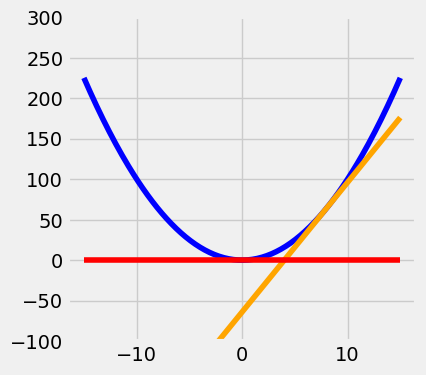

In [33]:
def f(x):
    return x**2
    
def df(x):
    return 16*x - 64

def plot(f, df):              
    x = np.linspace(-15, 15, 200)

    y = f(x)
    y_prime = df(x)

    plt.figure(figsize=(4, 4))
    plt.plot(x, y, label='f(x) = x²', color='blue')
    plt.plot(x, y_prime, label="f'(x) = 16x - 64", color='orange')
    plt.plot(x, [0] * len(x), color='red')
    plt.ylim(-100, 300)

    plt.show()

plot(f, df)

<!-- END QUESTION -->

### Question 5 ##

Data science is a rapidly expanding field and no degree program can hope to teach you everything that will be helpful to you as a data scientist. So it's important that you become familiar with looking up documentation and learning how to read it. 

Below is a section of code that plots a three-dimensional "wireframe" plot. You'll see what that means when you draw it. Replace each `# Your answer here` with a description of what the line above does, what the arguments being passed in are, and how the arguments are used in the function. For example,

```
np.arange(2, 5, 0.2)
# This returns an array of numbers from 2 to 5 with an interval size of 0.2
```

**Hint:** The `Shift` + `Tab` tip from earlier in the notebook may help here. Remember that objects must be defined in order for the documentation shortcut to work; for example, all of the documentation will show for method calls from `np` since we've already executed `import numpy as np`. However, since `z` is not yet defined in the kernel, `z.reshape()` will not show documentation until you run the line `z = np.cos(squared)`.

<!--
BEGIN QUESTION
name: q5
-->

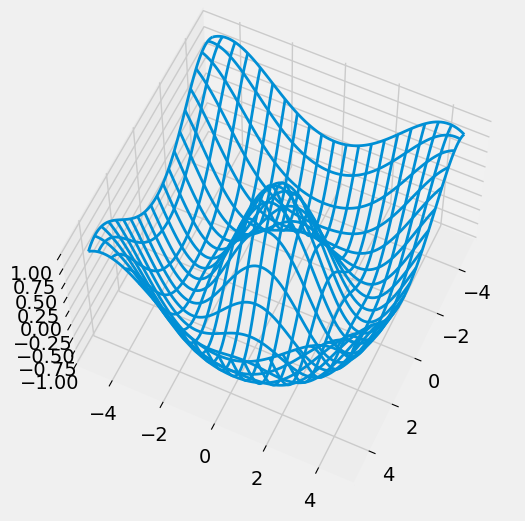

In [34]:
from mpl_toolkits.mplot3d import axes3d

u = np.linspace(1.5*np.pi, -1.5*np.pi, 100)
# Line space creates 100 evenly spaced values from 1.5π down to −1.5π
[x,y] = np.meshgrid(u, u)
#Turns 1-D array u into 2D(100x100) coordinate matrices
squared = np.sqrt(x.flatten()**2 + y.flatten()**2)
z = np.cos(squared)
# Compute z = cos(√(x^2 + y^2)) 
z = z.reshape(x.shape)
# Reshape z back to a 2-D array matching X/Y’s shape (100×100) so plotting accepts it.

fig = plt.figure(figsize=(6, 6))
# Create a 6×6 inch plotting figure.
ax = fig.add_subplot(111, projection='3d')
# Add one 3D subplot to the figure.
ax.plot_wireframe(x, y, z, rstride=5, cstride=5, lw=2)
# Plot a 3D wireframe; skip 5 rows/cols, set line width to 2.
ax.view_init(elev=60, azim=25)
# Set the 3D view angle (60° elevation, 25° azimuth).
plt.savefig("figure1.png")
# Save the figure as “figure1.png”.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [35]:
grader.check_all()

q1a results: All test cases passed!

q1b results: All test cases passed!

q1c results: All test cases passed!

q2 results: All test cases passed!

q3a results: All test cases passed!

q3b results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

* Save and Checkpoint

* Close and Halt

Then upload your .ipynb file to Canvas assignment Lab1